In [1]:
%matplotlib inline 
import pandas as pd
import os
import numpy as np 
import matplotlib.pyplot as plt

city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

df_city = pd.read_csv("data/city_data.csv")
df_ride = pd.read_csv("data/ride_data.csv")

df_merged = pd.merge(df_city, df_ride)

df_city_ride = df_merged
df_city_ride.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
# create a group based on the city column 
group_city = df_city_ride.groupby('city')

# average fare ($) per city
avg_fare = group_city['fare'].mean()

# total number of rides 
total_rides = group_city['ride_id'].nunique()

# total number of drivers 
total_drivers = group_city['driver_count'].count()

#determine city type
city_type = group_city['type'].max()

#create dataframe 
city_summary = pd.DataFrame({"Average City Fare" : avg_fare,
                            "Total Rides" : total_rides,
                            "Total Drivers" : total_drivers,
                            "City Type" : city_type})
city_summary.head()

,Average City Fare,Total Rides,Total Drivers,City Type
city,,,,
Amandaburgh,24.641667,18,18,Urban
Barajasview,25.332273,22,22,Urban
Barronchester,36.422500,16,16,Suburban
Bethanyland,32.956111,18,18,Suburban
Bradshawfurt,40.064000,10,10,Rural


In [3]:
# group by city type 
#urban 
urban = city_summary.loc[city_summary['City Type'] == 'Urban']
avg_fare_urban = urban['Average City Fare']
total_rides_urban = urban["Total Rides"]
total_drivers_urban = urban["Total Drivers"]

#suburban 
suburban = city_summary.loc[city_summary['City Type'] == 'Suburban']
avg_fare_suburban = suburban["Average City Fare"]
total_rides_suburban = suburban["Total Rides"]
total_drivers_suburban = suburban["Total Drivers"]

#rural 
rural = city_summary.loc[city_summary['City Type'] == 'Rural']
avg_fare_rural = rural["Average City Fare"]
total_rides_rural = rural["Total Rides"]
total_drivers_rural = rural["Total Drivers"]

city_summary.head()

,Average City Fare,Total Rides,Total Drivers,City Type
city,,,,
Amandaburgh,24.641667,18,18,Urban
Barajasview,25.332273,22,22,Urban
Barronchester,36.422500,16,16,Suburban
Bethanyland,32.956111,18,18,Suburban
Bradshawfurt,40.064000,10,10,Rural


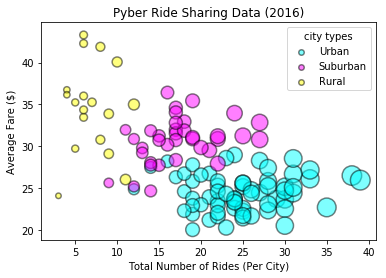

In [16]:
plt.figure()

urban_plot = plt.scatter(total_rides_urban, avg_fare_urban, s=total_drivers_urban*10,\
                        color = 'cyan', alpha = 0.5, edgecolor = 'black', linewidth = 1.5, label = 'Urban')
suburban_plot = plt.scatter(total_rides_suburban, avg_fare_suburban, s=total_drivers_suburban*10,\
                           color = 'magenta', alpha = 0.5, edgecolor = 'black', linewidth = 1.5, label = 'Suburban')
rural_plot = plt.scatter(total_rides_rural, avg_fare_rural, s=total_drivers_rural*10,\
                        color = 'yellow', alpha = 0.5, edgecolor = 'black', linewidth = 1.5, label = 'Rural')

# label chart
plt.title ('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')


# add and format legend
lgnd = plt.legend(handles=[urban_plot,suburban_plot,rural_plot], loc ='best',title = 'city types')
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

plt.show()

TOTAL FARES BY CITY TYPE:

In [5]:
#% of total fares by city type
# group by city type 
group_type = df_city_ride.groupby(['type'])

# calculate the total fare per city type 
total_fare_all = group_type['fare'].sum()
total_fare_df = pd.DataFrame({"Total Fare Per Type" : total_fare_all})
total_fare_df

,Total Fare Per Type
type,
Rural,4327.93
Suburban,19356.33
Urban,39854.38


In [6]:
# Calculate the percent of each city type 
percent_per_type = total_fare_df["Total Fare Per Type"] / total_fare_df["Total Fare Per Type"].sum()*100
percent_per_type_df = pd.DataFrame({"Percentage" : percent_per_type})
percent_per_type_df

,Percentage
type,
Rural,6.811493
Suburban,30.463872
Urban,62.724635


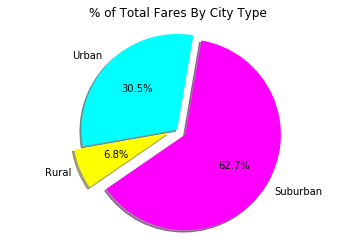

In [17]:
#Summarize 
percent_per_type_f = pd.merge(total_fare_df, percent_per_type_df, right_index = True, left_index = True)

percent_f_rural = percent_per_type_f.iloc[0][1]
percent_f_urban = percent_per_type_f.iloc[1][1]
percent_f_suburban = percent_per_type_f.iloc[2][1]

#Create Pie Chart 
fexplode = [0.1, 0.1, 0]
flabels = ['Rural', 'Suburban', 'Urban']
percents_fare = [percent_f_rural, percent_f_suburban, percent_f_urban]
fcolors = ['yellow', 'magenta', 'cyan']

plt.pie(percents_fare, labels = flabels, colors = fcolors, explode = fexplode,\
        autopct="{0:1.1f}%".format, shadow=True, startangle=190)

plt.title('% of Total Fares By City Type')
plt.axis("equal")

plt.show()

TOTAL RIDES BY CITY TYPE:

In [8]:
#% of rides per city type 
#Calculate total rides per city type 
total_rides_r = group_type['ride_id'].nunique()
total_rides_df = pd.DataFrame({"Total Rides Per Type" : total_rides_r})
total_rides_df

,Total Rides Per Type
type,
Rural,125
Suburban,625
Urban,1625


In [9]:
#Calculate the percent of each city type
percent_per_type_r = total_rides_df['Total Rides Per Type']/ total_rides_df["Total Rides Per Type"].sum()*100
percent_per_type_dff = pd.DataFrame({"Percentage" : percent_per_type_r})
percent_per_type_dff

,Percentage
type,
Rural,5.263158
Suburban,26.315789
Urban,68.421053


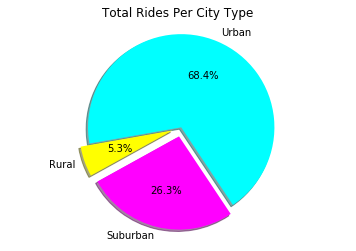

In [22]:
# Summarize
percent_rides_type = pd.merge(total_rides_df,percent_per_type_dff , right_index=True, left_index=True)

percent_r_rural = percent_rides_type.iloc[0][1]
percent_r_suburban = percent_rides_type.iloc[1][1]
percent_r_urban = percent_rides_type.iloc[2][1]

# Create Pie Chart 
rexplode = [0.1, 0.1, 0]
rlabels = ['Rural', "Suburban", 'Urban']
percents_rides = [percent_r_rural, percent_r_suburban, percent_r_urban]
rcolors = ['yellow', 'magenta', 'cyan']

plt.pie(percents_rides, labels = rlabels, colors = rcolors, explode = rexplode,\
        autopct="{0:1.1f}%".format, shadow=True, startangle=190)
plt.title('Total Rides Per City Type')
plt.axis("equal")

plt.show()

TOTAL DRIVERS BY CITY TYPE:

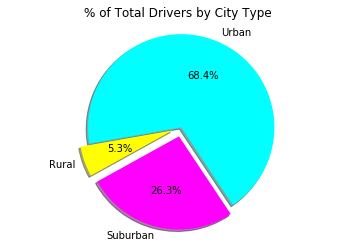

In [21]:
# % of total drivers per city type 
# Calculate total drivers and total drivers by city type
urban_d = city_summary.loc[city_summary['City Type']=='Urban']
total_urban_d = urban_d['Total Drivers'].sum()

suburban_d = city_summary.loc[city_summary['City Type']=='Suburban']
total_suburban_d = suburban_d['Total Drivers'].sum()

rural_d = city_summary.loc[city_summary['City Type']=='Rural']
total_rural_d = rural_d['Total Drivers'].sum()

total_drivers_all = city_summary['Total Drivers'].sum()

# Calculate percent of each city type
percent_urban_d = total_urban_d / total_drivers_all * 100
percent_suburban_d = total_suburban_d / total_drivers_all * 100
percent_rural_d = total_rural_d / total_drivers_all * 100

# User bar chart
dexplode = [0.1, 0.1, 0]
dlabels = ['Rural', 'Suburban', 'Urban']
percents_drivers = [percent_rural_d, percent_suburban_d, percent_urban_d]
dcolors = ['yellow', 'magenta', 'cyan']

plt.pie(percents_drivers, labels=dlabels, colors=dcolors, explode=dexplode, 
        autopct="{0:1.1f}%".format, shadow=True, startangle=190)
plt.title('% of Total Drivers by City Type')
plt.axis("equal")

plt.show()